In [1]:
import nmresearch as nmr
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


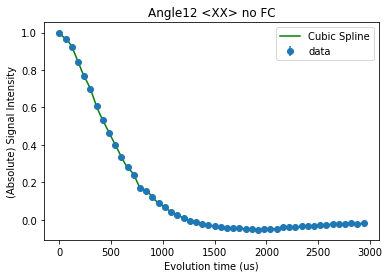

In [2]:
ang12_xx = nmr.Experiment(296).tpc(cycle=60,title="Angle12 <XX> no FC",normalize=True)

In [3]:
test = nmr.Experiment(296)

In [4]:
reals = np.real(test.nmr_data[:,0])

In [5]:
errs = np.concatenate((np.real(test.nmr_data[:,-11:-1]), np.imag(test.nmr_data[:,-11:-1])),1)

In [6]:
std_err = np.std(errs,1)

In [7]:
std_err/reals[0]

array([0.00142915, 0.00185603, 0.00113344, 0.00161264, 0.00172175,
       0.00173643, 0.00189445, 0.00185991, 0.00157389, 0.00167277,
       0.00149942, 0.00189687, 0.00185804, 0.0017003 , 0.00165449,
       0.00131841, 0.00150931, 0.00171794, 0.00133836, 0.00137082,
       0.00135332, 0.00154155, 0.00184842, 0.00180986, 0.00226952,
       0.00154244, 0.0018508 , 0.00143742, 0.00168078, 0.00124555,
       0.00159504, 0.00162873, 0.00153903, 0.00132602, 0.00109141,
       0.00162797, 0.00236857, 0.00177478, 0.00187649, 0.00179351,
       0.0014628 , 0.00165577, 0.00137635, 0.00162783, 0.00156512,
       0.00163729, 0.00141601, 0.00211868, 0.00132711, 0.00148653])

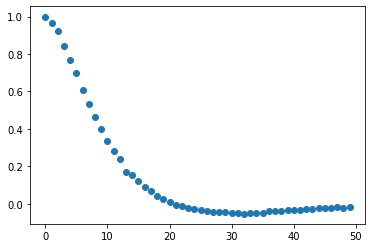

In [8]:
plt.errorbar(list(range(len(reals))),reals/reals[0],std_err/reals[0],marker='o',linestyle='')
plt.show()

In [9]:
def exp_fit(decay, show=False, c1=None, gauss=False):
    t = np.array(list(range(len(decay))))
    square = np.array([val**2 for val in t])
    tf = np.arange(0,t[-1],.1)
    tfsq = np.array([val**2 for val in tf])
    if gauss:
        p = np.polyfit(square, np.log(decay), 1)
    else:
        p = np.polyfit(t, np.log(decay), 1)
    
    if gauss:
        if c1 is not None:
            plt.plot(tf, np.exp(p[0]*tfsq+p[1]), label=r"$u = {}$, Fitted $\tau=${:.2f}".format(c1, np.sqrt(-1/p[0])))
            plt.scatter(t,decay,label=r"$u=${} data".format(c1))
        else:
            plt.plot(tf, np.exp(p[0]*tfsq+p[1]), label=r"Fitted $\tau=${:.2f}".format(np.sqrt(-1/p[0])))
            plt.scatter(t,decay,label="data")
    else:
        if c1 is not None:
            plt.plot(tf, np.exp(p[0]*tf+p[1]), label=r"$u = {}$, Fitted $\tau=${:.2f}".format(c1, -1/p[0]))
            plt.scatter(t,decay,label=r"$u=${} data".format(c1))
        else:
            plt.plot(tf, np.exp(p[0]*tf+p[1]), label=r"Fitted $\tau=${:.2f}".format(-1/p[0]))
            plt.scatter(t,decay,label="data")


C:\Users\awsta\Documents\workspace\qeg-env\lib\site-packages\nmrglue\fileio\bruker.py:394: UserWarning: Error reading the pulse program
  warn('Error reading the pulse program')


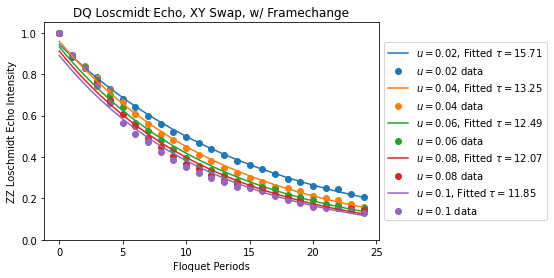

In [10]:
dq_echo_swap_fc,errs = nmr.Experiment(614,folder='expt6').load_tpc3d(errors=True)
cnst1 = [0,.02,.04,.06,.08,.10]

swap_fc_tau = []

for decay, c1 in zip(dq_echo_swap_fc[1:], cnst1[1:]):
    swap_fc_tau.append(exp_fit(decay, c1=c1))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel("Floquet Periods")
plt.ylabel("ZZ Loschmidt Echo Intensity")
plt.title("DQ Loscmidt Echo, XY Swap, w/ Framechange")
plt.ylim([0,1.05])
plt.show()

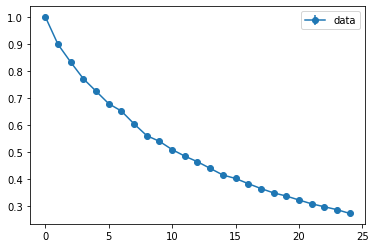

In [11]:
plt.errorbar(list(range(25)),dq_echo_swap_fc[0],errs[0],marker="o",label="data")
plt.legend()
plt.show()

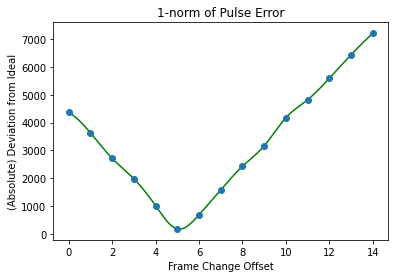

Over-rotation angle is given by 5 deg.


array([32.65164621, 37.51016529, 33.03369492, 38.15396441, 35.36919564,
       33.86177786, 34.53773299, 38.29010969, 36.25334467, 34.62188614,
       35.02681116, 37.45564043, 39.29306555, 31.33296986, 36.39086424])

In [12]:
nmr.Experiment(291,folder='expt8').calibrate_framechange(phase_inc=1)